In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
df = pd.read_excel('../raw_data/cleaned_data.xlsx').drop('Unnamed: 0',axis=1)
df.head()

,Date,BBWI_COO,F_COO,JCI_COO,TDG_COO,F_MTD,F_LH,HWM_LH,MLM_LH,NUE_LH,...,MSI_ROL,PCAR_ROL,GM_FIS,F_EBAY,NUE_EBAY,FDS_WELL,MOS_WELL,MPC_PPL,ALB_EXPE,RCL_TECH
0,2022-02-28,0.129193,0.042231,0.156810,1.584798,0.012260,0.064036,0.133031,1.404187,0.484114,...,6.742737,2.808011,0.495365,0.319138,2.412710,4.935906,0.635854,2.988404,0.995263,0.192802
1,2022-03-01,0.122627,0.039940,0.150227,1.548209,0.011789,0.061400,0.123631,1.362175,0.485791,...,6.507946,2.687288,0.479900,0.304849,2.411949,5.063797,0.636321,2.960085,0.988901,0.175641
2,2022-03-02,0.127060,0.042827,0.153257,1.580083,0.012833,0.066205,0.130499,1.396640,0.509156,...,6.522044,2.683561,0.491021,0.325967,2.506883,5.016822,0.645197,3.006327,0.990627,0.178398
3,2022-03-03,0.123758,0.041503,0.153000,1.525741,0.012324,0.064374,0.129454,1.394769,0.507366,...,6.605538,2.732250,0.489219,0.320865,2.528921,4.881579,0.660018,2.987481,1.002189,0.171448
4,2022-03-04,0.116190,0.039042,0.146333,1.450059,0.011934,0.061930,0.126352,1.398574,0.514247,...,6.543394,2.580805,0.473214,0.300348,2.493976,4.801994,0.695534,2.951453,1.012437,0.166966


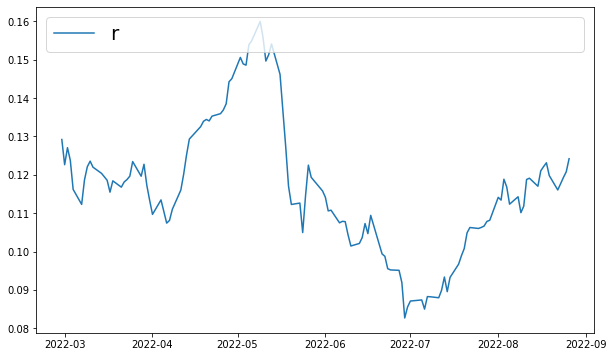

In [177]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
line1= ax2.plot(df['Date'],df[df.columns[1]])
ax2.legend(handles=line1,labels='ratio',loc='upper left',fontsize=20,mode='expand')

In [184]:
df = pd.read_excel('../raw_data/cleaned_data.xlsx').drop('Unnamed: 0',axis=1)
df.head()
no_dates = df.drop('Date',axis=1).max()

In [187]:
l = []
for vals in no_dates:
    l.append(vals)
max(l)
min(l)

0.01283270796827949